In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
train = pd.read_csv('TRAINING_.csv')

In [3]:
test = pd.read_csv('TEST_.csv')

In [4]:
submission = pd.read_csv('SAMPLE_.csv')

In [5]:
test['Grade']='test'

In [6]:
combinedf = pd.concat([train,test],axis = 0)

In [7]:
print("Total size of train data:-",train.shape)
print("Total size test data:-",test.shape)
print("Total size of data:-",combinedf.shape)

Total size of train data:- (7000, 14)
Total size test data:- (3299, 14)
Total size of data:- (10299, 14)


## Pandas Profiling

In [8]:
profile = ProfileReport(combinedf, title="Profiling Report")

In [9]:
#profile

In [10]:
combinedf.head(3)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$


In [11]:
combinedf.tail(3)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
3296,3297,307,8.0,4.0,5.0,6.0,yes,88.0,88.0,4,83.0,6,test,3824$
3297,3298,352,5.0,3.0,4.0,5.0,YES,88.0,100.0,2,99.0,4,test,3533$
3298,3299,329,5.0,3.0,1.0,3.0,yes,82.0,83.0,3,97.0,5,test,3404$


## Missing Value Imputation

In [12]:
for column in combinedf.columns:
    missing_count = combinedf[column].isnull().sum()
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} missing values.")

Column 'Troom' has 3 missing values.
Column 'Nbedrooms' has 4 missing values.
Column 'Nbwashrooms' has 3 missing values.
Column 'Twashrooms' has 1 missing values.
Column 'roof' has 2006 missing values.
Column 'Roof(Area)' has 2006 missing values.
Column 'Lawn(Area)' has 3 missing values.
Column 'API' has 2 missing values.


In [13]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 3298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10299 non-null  int64  
 1   Area(total)  10299 non-null  int64  
 2   Troom        10296 non-null  float64
 3   Nbedrooms    10295 non-null  float64
 4   Nbwashrooms  10296 non-null  float64
 5   Twashrooms   10298 non-null  float64
 6   roof         8293 non-null   object 
 7   Roof(Area)   8293 non-null   float64
 8   Lawn(Area)   10296 non-null  float64
 9   Nfloors      10299 non-null  int64  
 10  API          10297 non-null  float64
 11  ANB          10299 non-null  int64  
 12  Grade        10299 non-null  object 
 13  EXPECTED     10299 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 1.2+ MB


In [14]:
combinedf.roof.replace(['no','NO'],'No',inplace=True)

In [15]:
combinedf.roof.replace(['yes','YES'],'Yes',inplace=True)

In [16]:
combinedf.roof.value_counts(dropna=False)

No     4195
Yes    4098
NaN    2006
Name: roof, dtype: int64

In [17]:
combinedf.roof.fillna('Not known',inplace=True)

In [18]:
numeric_columns = combinedf.select_dtypes(include=['float64', 'int64']).columns
df_numeric = combinedf[numeric_columns]

numeric_imputer = IterativeImputer(max_iter=10, random_state=0)

df_numeric_imputed = numeric_imputer.fit_transform(df_numeric)

combinedf[numeric_columns] = df_numeric_imputed

## Converting float64 into int

In [19]:
for column in combinedf.select_dtypes(include=['float64']).columns:
    combinedf[column] = combinedf[column].astype(int)

In [20]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 3298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10299 non-null  int32 
 1   Area(total)  10299 non-null  int32 
 2   Troom        10299 non-null  int32 
 3   Nbedrooms    10299 non-null  int32 
 4   Nbwashrooms  10299 non-null  int32 
 5   Twashrooms   10299 non-null  int32 
 6   roof         10299 non-null  object
 7   Roof(Area)   10299 non-null  int32 
 8   Lawn(Area)   10299 non-null  int32 
 9   Nfloors      10299 non-null  int32 
 10  API          10299 non-null  int32 
 11  ANB          10299 non-null  int32 
 12  Grade        10299 non-null  object
 13  EXPECTED     10299 non-null  object
dtypes: int32(11), object(3)
memory usage: 764.4+ KB


In [21]:
combinedf.EXPECTED.head(2)

0    3826$
1    4458$
Name: EXPECTED, dtype: object

In [22]:
combinedf.EXPECTED = combinedf.EXPECTED.str.replace('$','')

C:\Users\Hp\AppData\Local\Temp\ipykernel_19660\1157196261.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combinedf.EXPECTED = combinedf.EXPECTED.str.replace('$','')


In [23]:
combinedf.EXPECTED = combinedf.EXPECTED.astype('int')

In [24]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 3298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10299 non-null  int32 
 1   Area(total)  10299 non-null  int32 
 2   Troom        10299 non-null  int32 
 3   Nbedrooms    10299 non-null  int32 
 4   Nbwashrooms  10299 non-null  int32 
 5   Twashrooms   10299 non-null  int32 
 6   roof         10299 non-null  object
 7   Roof(Area)   10299 non-null  int32 
 8   Lawn(Area)   10299 non-null  int32 
 9   Nfloors      10299 non-null  int32 
 10  API          10299 non-null  int32 
 11  ANB          10299 non-null  int32 
 12  Grade        10299 non-null  object
 13  EXPECTED     10299 non-null  int32 
dtypes: int32(12), object(2)
memory usage: 724.1+ KB


## Exploratory Data Analysis

In [25]:
combinedf.drop('Nbwashrooms',axis=1,inplace=True)

In [26]:
train_df = combinedf[combinedf.Grade != 'test']

In [27]:
test_df  = combinedf[combinedf.Grade == 'test'].drop('Grade', axis = 1)

In [28]:
print(train_df.shape)
print(test_df.shape)

(7000, 13)
(3299, 12)


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           7000 non-null   int32 
 1   Area(total)  7000 non-null   int32 
 2   Troom        7000 non-null   int32 
 3   Nbedrooms    7000 non-null   int32 
 4   Twashrooms   7000 non-null   int32 
 5   roof         7000 non-null   object
 6   Roof(Area)   7000 non-null   int32 
 7   Lawn(Area)   7000 non-null   int32 
 8   Nfloors      7000 non-null   int32 
 9   API          7000 non-null   int32 
 10  ANB          7000 non-null   int32 
 11  Grade        7000 non-null   object
 12  EXPECTED     7000 non-null   int32 
dtypes: int32(11), object(2)
memory usage: 464.8+ KB


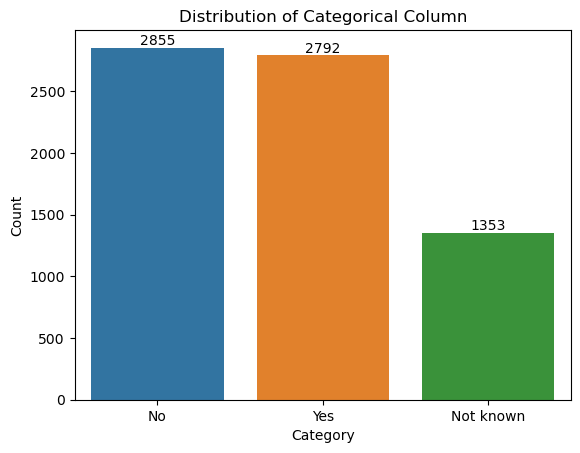

In [30]:
#1)  Distribution of Categorical Column
ax = sns.countplot(x = train_df.roof,data = train_df)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categorical Column')
plt.show()

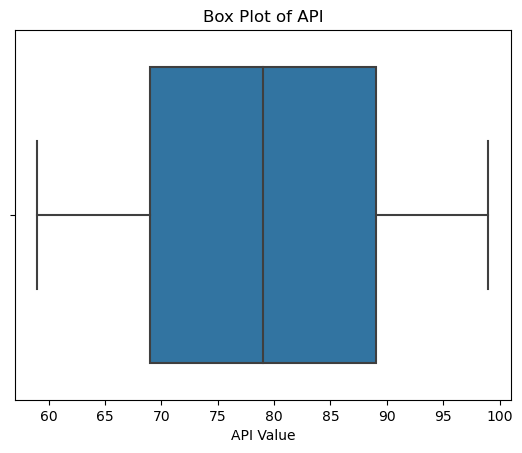

In [31]:
# 2) Outlier Detection
sns.boxplot(x='API', data=train_df)
plt.xlabel('API Value')
plt.title('Box Plot of API')
plt.show()

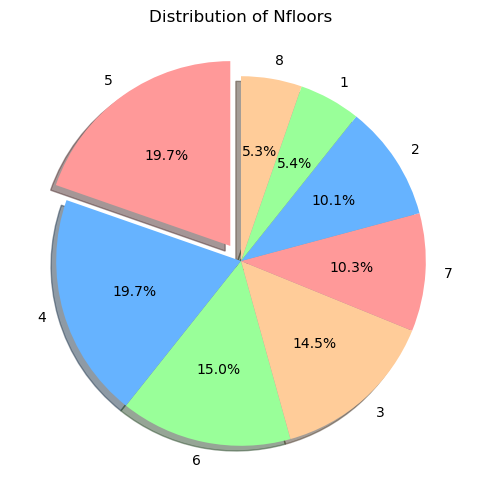

In [32]:
nfloors_counts = train_df['Nfloors'].value_counts()
explode = (0.1, 0, 0, 0,0,0,0,0)

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(nfloors_counts, labels=nfloors_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=explode, shadow=True)

plt.title('Distribution of Nfloors')

plt.show()

In [33]:
train_df.head(2)

,id,Area(total),Troom,Nbedrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8,2,3,No,0,76,2,63,4,D,3826
1,2,344,6,7,8,No,0,83,7,97,1,B,4458


## Scaling the data

In [34]:
test_df['Grade']='test'

In [35]:
combine_df = pd.concat([train_df,test_df],axis=0)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
numerical_columns = ['Area(total)','Roof(Area)', 'Lawn(Area)','API', 'ANB','EXPECTED']
combine_df[numerical_columns] = scaler.fit_transform(combine_df[numerical_columns])

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder = LabelEncoder()

In [41]:
combine_df['roof'] = label_encoder.fit_transform(combine_df['roof'])

In [42]:
combine_df.head()

,id,Area(total),Troom,Nbedrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,0.214286,8,2,3,0,0.000000,0.150,2,0.100,0.6,D,0.359016
1,2,0.771429,6,7,8,0,0.000000,0.325,7,0.950,0.0,B,0.563613
2,3,0.057143,8,4,4,2,0.808333,0.200,1,0.725,0.6,C,0.479767
3,4,0.542857,5,4,4,0,0.000000,0.525,5,0.675,0.0,D,0.241178
4,5,0.071429,9,5,5,1,0.391667,0.675,4,0.850,0.4,C,0.591130


In [43]:
# for dependent variable
#grade_encoding = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1}
#combine_df['Grade'] = combine_df['Grade'].replace(grade_encoding)

In [44]:
combine_df.drop('id',axis=1,inplace=True)

In [45]:
x=combine_df[combine_df.Grade!='test']
y=(combine_df[combine_df.Grade=='test']).drop('Grade',axis=1)

## Model Building & Evaluation

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x.drop('Grade',axis=1), x.Grade, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=3000,class_weight='balanced')

In [50]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=3000,
                   multi_class='multinomial')

In [51]:
lr.score(X_train,y_train)

0.8596428571428572

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
np.mean(cross_val_score(lr,X_train,y_train,cv=5))

0.8516071428571428

In [54]:
y_pred = lr.predict(X_test)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.81      0.89      0.85        94
           B       0.78      0.88      0.83       296
           C       0.91      0.82      0.86       586
           D       0.89      0.88      0.89       419
           E       0.24      1.00      0.38         5

    accuracy                           0.85      1400
   macro avg       0.73      0.89      0.76      1400
weighted avg       0.87      0.85      0.86      1400



In [57]:
lr_test_pred = lr.predict(y)

In [58]:
lr_test_pred=pd.DataFrame(lr_test_pred)

In [59]:
submission.Grade=pd.DataFrame(lr_test_pred)

In [60]:
submission.to_csv('rf.csv',index=False)

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Multi-Layer Perceptron', MLPClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Bagging', BaggingClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('Gaussian Process', GaussianProcessClassifier()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis())]

for name, classifier in classifiers:
    clf = classifier
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{name} Accuracy: {accuracy:.2f}')

Decision Tree Accuracy: 0.80
Random Forest Accuracy: 0.88
Support Vector Machine Accuracy: 0.90
Multinomial Naive Bayes Accuracy: 0.43
Logistic Regression Accuracy: 0.79


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbors Accuracy: 0.85


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron Accuracy: 0.93
Gradient Boosting Accuracy: 0.88
AdaBoost Accuracy: 0.54
Bagging Accuracy: 0.84
Extra Trees Accuracy: 0.90
Gaussian Process Accuracy: 0.89
Quadratic Discriminant Analysis Accuracy: 0.87


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [63]:
#sv

In [64]:
from sklearn.svm import SVC

In [65]:
sv = SVC()

In [66]:
sv.fit(X_train,y_train)

SVC()

In [67]:
sv.score(X_train,y_train)

0.8975

In [68]:
np.mean(cross_val_score(sv,X_train,y_train,cv=5))

0.8896428571428571

In [69]:
y_pred = sv.predict(X_test)

In [70]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           A       0.67      0.94      0.78        67
           B       0.90      0.84      0.87       315
           C       0.93      0.90      0.91       611
           D       0.91      0.94      0.92       407
           E       0.00      0.00      0.00         0

    accuracy                           0.90      1400
   macro avg       0.68      0.72      0.70      1400
weighted avg       0.91      0.90      0.90      1400



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
sv_test_pred = sv.predict(y)

In [72]:
submission.Grade=pd.DataFrame(sv_test_pred)

In [73]:
submission.to_csv('sv.csv',index=False)

In [74]:
# mlp

In [125]:
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)

In [113]:
clf.predict_proba(X_test[:1])

array([[1.01426345e-34, 4.73856225e-20, 1.01920061e-07, 9.99999898e-01,
        2.43091770e-11]])

In [127]:
clf.score(X_test, y_test)

0.9435714285714286

In [121]:
np.mean(cross_val_score(clf,X_train,y_train,cv=5))

0.9275

In [128]:
clf_test_pred = clf.predict(y)

In [129]:
submission.Grade = pd.DataFrame(clf_test_pred)

In [130]:
submission.to_csv('clf3.csv',index=False)

In [105]:
gbm = GradientBoostingClassifier(n_estimators=1200, learning_rate=1.0, max_depth=8, random_state=0)

In [106]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=8, n_estimators=1200,
                           random_state=0)

In [107]:
gbm.score(X_train,y_train)

0.9998214285714285

In [108]:
np.mean(cross_val_score(gbm,X_train,y_train,cv=5))

0.8841071428571429

In [85]:
gbm_test_pred = gbm.predict(y)

In [86]:
submission.Grade = pd.DataFrame(gbm_test_pred)

In [87]:
submission.to_csv('gbm.csv',index=False)

In [88]:
#rf

In [89]:
rfm = RandomForestClassifier(max_depth=10, random_state=0)
rfm.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [90]:
rfm.score(X_train,y_train)

0.9667857142857142

In [91]:
np.mean(cross_val_score(rfm,X_train,y_train,cv=5))

0.8701785714285715

In [92]:
rfm_test_pred = rfm.predict(y)

In [93]:
submission.Grade = pd.DataFrame(rfm_test_pred)

In [94]:
submission.to_csv('rfm.csv',index=False)

In [95]:
# Extra trees classifier

In [99]:
etc = ExtraTreesClassifier(n_estimators=1000,max_depth=150)
etc.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=150, n_estimators=1000)

In [100]:
etc.score(X_train,y_train)

1.0

In [101]:
np.mean(cross_val_score(etc,X_train,y_train,cv=5))

0.8916071428571428

In [102]:
etc_test_pred = etc.predict(y)

In [103]:
submission.Grade = pd.DataFrame(etc_test_pred)

In [104]:
submission.to_csv('etc.csv',index=False)

In [133]:
import os

os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'


In [135]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test = X_train / 255.0, X_test / 255.0

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10)


y_pred = model.predict_classes(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'CNN Accuracy: {accuracy:.2f}')


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates